In [2]:
# Importing the numpy library (for arrays operations)
# Importing the pandas library (for data analysis)
# Importing the matplotlib.pyplot interface (for MATLAB-like plots)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dataset preparation
We start by loading the dataset (csv file) we shall work with. We use Netflix stock price from 01/03/2012 to 12/31/2021 downloaded from investing.com:<br>
https://www.investing.com/equities/netflix,-inc.-historical-data

In [3]:
# Storing the data in DataFrame "df", sorted by date in ascending order

df = pd.read_csv('NFLX Historical Data.csv')
df = df[::-1]
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
2517,"Jan 03, 2012",10.32,10.04,10.39,10.02,29.22M,4.24%
2516,"Jan 04, 2012",11.49,10.34,11.57,10.26,100.55M,11.34%
2515,"Jan 05, 2012",11.33,11.35,11.69,11.04,86.61M,-1.39%
2514,"Jan 06, 2012",12.33,11.30,12.47,11.24,125.66M,8.83%
2513,"Jan 09, 2012",14.03,12.80,14.24,12.45,214.07M,13.79%


In [4]:
# Keeping only the "Open" values of Netflix stock, and rechaping the DataFrame into a vertical numpy array

arr = df['Open'].values
arr = arr.reshape(-1, 1)
arr.shape

(2518, 1)

In [5]:
# Splitting the data into a training set stored in array "arr_train" (first 80% of the rows of "arr")
# And a test set stored in array "arr_test" (last 20% of the rows of "arr").

arr_train = arr[:int(arr.shape[0]*0.8)]
arr_test = arr[int(arr.shape[0]*0.8):]
print(arr_train.shape)
print(arr_test.shape)

(2014, 1)
(504, 1)


In [6]:
# Importing the estimator "MinMaxScaler" from the sklearn.preprocessing module
# (to rescale data to a given range, typically the interval [0,1])
# See https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

from sklearn.preprocessing import MinMaxScaler

# Rescaling "arr_train" and "arr_test" to the interval [0,1]

scaler = MinMaxScaler()
arr_train = scaler.fit_transform(arr_train)
arr_test = scaler.fit_transform(arr_test)
print('Rescaled arr_train:\n', arr_train[:5], '\n\n', 'Rescaled arr_test:\n', arr_test[:5])

Rescaled arr_train:
 [[0.00563251]
 [0.00635772]
 [0.00879928]
 [0.00867842]
 [0.01230449]] 

 Rescaled arr_test:
 [[0.06642321]
 [0.05707646]
 [0.09116911]
 [0.0784514 ]
 [0.10529138]]


In [7]:
# Defining a function "create_data" which creates two numpy arrays x, y from an input array "arr"
# The 1D numpy array y contains all the last values of arr, starting from the 50th value
# The 2D numpy array x contains all the lists of last 50 values of arr

def create_data(arr):
    x, y = [], []
    for i in range(50, arr.shape[0]):
        x.append(arr[i-50: i, 0])
        y.append(arr[i, 0])
    x, y = np.array(x), np.array(y)
    return x,y 

In [8]:
# Using the function "create_data" to create the training and test datasets

x_train, y_train = create_data(arr_train)
x_test, y_test = create_data(arr_test)

# LSTM model

In [9]:
# Importing the "Sequential" class from the keras.models API (to group a linear stack of layers into a model)
# See https://faroit.com/keras-docs/1.2.0/getting-started/sequential-model-guide/
# See https://keras.io/api/models/sequential/

# Importing the "load_model" function from the keras.models API (to load a model saved via model.save())
# See https://www.geeksforgeeks.org/save-and-load-models-in-tensorflow/
# See https://keras.io/api/models/model_saving_apis/#loadmodel-function

# Importing the "LSTM" class from the keras.layers API (to load the long short-term memory layer to be used)
# See https://keras.io/api/layers/recurrent_layers/lstm/

# Importing the "Dense" class from the keras.layers API (to load the regular densely-connected NN layer to be used)
# See https://keras.io/api/layers/core_layers/dense/

# Importing the "Dropout" class from the keras.layers API (to apply dropout to the input)
# See https://keras.io/api/layers/regularization_layers/dropout/

from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [10]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [11]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [12]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [13]:
# Saving the model's architecture, weights values, and compile() information in a HDF5 file
# See https://www.tensorflow.org/guide/keras/save_and_serialize#keras_h5_format

model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_price.h5')

Epoch 1/50
62/62 [==============================] - 8s 67ms/step - loss: 0.0130
Epoch 2/50
62/62 [==============================] - 7s 111ms/step - loss: 0.0027
Epoch 3/50
62/62 [==============================] - 6s 103ms/step - loss: 0.0027
Epoch 4/50
62/62 [==============================] - 6s 103ms/step - loss: 0.0027
Epoch 5/50
62/62 [==============================] - 7s 106ms/step - loss: 0.0023
Epoch 6/50
62/62 [==============================] - 6s 102ms/step - loss: 0.0019
Epoch 7/50
62/62 [==============================] - 7s 105ms/step - loss: 0.0026
Epoch 8/50
62/62 [==============================] - 6s 101ms/step - loss: 0.0023
Epoch 9/50
62/62 [==============================] - 6s 102ms/step - loss: 0.0023
Epoch 10/50
62/62 [==============================] - 7s 107ms/step - loss: 0.0019
Epoch 11/50
62/62 [==============================] - 8s 121ms/step - loss: 0.0018
Epoch 12/50
62/62 [==============================] - 7s 112ms/step - loss: 0.0024
Epoch 13/50
62/62 [=======

In [47]:
# Storing in numpy array "predicted_prices" the stock prices predicted by the LSTM model
# Storing in numpy array "real_prices" the real stock prices
# Rescaling both datasets to the original scale

model = load_model('stock_price.h5')
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Results

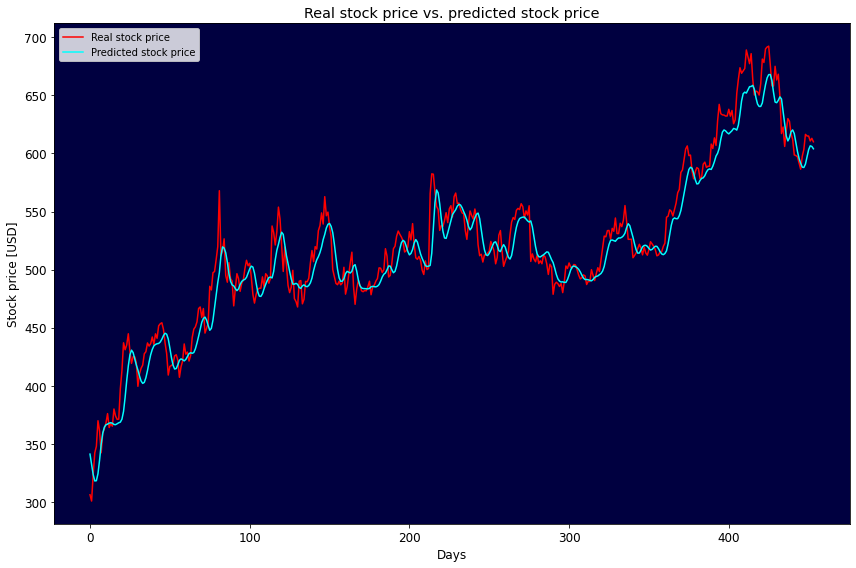

In [53]:
# Line plot of real stock prices vs. predicted stock prices
# Parameters, title and legend of the line plot

_, p = plt.subplots(figsize=(12,8))

p.plot(real_prices, color='r', label='Real stock price')
p.plot(predicted_prices, color='cyan', label='Predicted stock price')

p.set_title('Real stock price vs. predicted stock price', size='x-large')
p.set_ylabel('Stock price [USD]', size='large')
p.set_xlabel('Days', size='large')
p.set_facecolor('#000040')
p.legend()

plt.tight_layout()